In [30]:
import requests 
import pandas as pd
import numpy as np
import sys; sys.path
import datetime
import pandas as pd
import numpy as np 
from datetime import datetime
from datetime import datetime
from tqdm import tqdm
import random
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler

from bitcoin_deep_learning.call_api import ApiCall
from bitcoin_deep_learning.model import LinearRegressionBaselineModel, RnnDlModel,RandomForestReg, DummyModel, RnnDlModel_test
from bitcoin_deep_learning.trainer import cv_train, read_result
from bitcoin_deep_learning.cross_val import cross_val, get_cross_XY, cross_val_trade
from bitcoin_deep_learning.metrics import *
api = ApiCall()

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
scaler = MinMaxScaler()
train_df= ApiCall().read_local()
for i in range(1,len(list(train_df.columns))-1):
    train_df[list(train_df.columns)[i]] = scaler.fit_transform(np.array(train_df[train_df.columns[1]]).reshape(-1, 1))
train_df

In [ ]:
model = RandomForestReg()
cv_train(model,train_df)
read_result().sort_values(by="date")

In [ ]:
"yolo"

In [ ]:
for n_estimators in [100,500,700,1000,1500,3000]:
    for warm_start in  [True,False]:
        for bootstrap in [True,False]:
            for criterion in ["squared_error", "absolute_error", "poisson"]:
                for min_samples_leaf in [1,5,10,20]:
                    model = RandomForestReg(warm_start=warm_start,
                                            n_estimators=n_estimators,
                                           bootstrap=bootstrap,
                                           criterion=criterion,
                                           min_samples_leaf=min_samples_leaf)

                    cv_train(model,train_df)

In [ ]:
X0 = [[i+5,-2*i]for i in range(1001)]
X1 = np.sin(np.arange(1001))

In [ ]:
df = pd.DataFrame(X0)
df["date"] = X1
df

In [ ]:
model = LinearRegressionBaselineModel()
#model = RnnDlModel(epochs=10,patience=2)
past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)

In [ ]:
past_reality[0]

In [ ]:
plt.plot(reality[0])

In [ ]:
plt.plot(prediction_diff[0],c="r")
plt.plot(reality_diff[0])

In [ ]:
model = LinearRegressionBaselineModel()
#model = RnnDlModel(epochs=10,patience=2)
past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
plt.plot(prediction_diff[0],c="r")
plt.plot(reality_diff[0])

In [ ]:
df

In [ ]:
X_train_list, Y_train_list, X_test_list,Y_test_list = get_cross_XY(df.drop(columns="date"),data=None)

In [ ]:
X_train, Y_train, X_test,Y_test = X_train_list[0], Y_train_list[0], X_test_list[0],Y_test_list[0]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
#X_train_scaled =  scaler.fit_transform(X_train[:,-1,:])
#X_test_scaled = scaler.transform(X_test[:,-1,:])
X_train_scaled =  (X_train[:,-1,:])
X_test_scaled = (X_test[:,-1,:])
X_train_scaled

In [ ]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(X_train_scaled,Y_train)
Y_pred = model.predict(X_test_scaled)
plt.plot(Y_pred)
plt.plot(Y_test)

In [ ]:
Y_train

In [ ]:
X_train[:,-1,:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(X_train[:,-1,:])

In [ ]:
X_train[:,-1,:]

In [ ]:
model = LinearRegressionBaselineModel(alpha=0.1,l1_ratio=0.001)
df = ApiCall().read_local()
X_train_list, Y_train_list, X_test_list,Y_test_list = get_cross_XY(df,data=None)



In [ ]:
cross_val_trade(model,df)

In [ ]:
past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)

In [ ]:
ct = 0
preds = []
computed_reality = []
for past_prices, diffs in zip(past_reality,prediction_diff):
    preds.append(past_prices * diffs+ past_prices)
preds  

In [ ]:
df = api.read_local()
scaler = MinMaxScaler()
#df  =scaler.fit_transform(df.drop(columns="date"))

In [ ]:
df[df.columns[1]].shape

In [ ]:
df

In [ ]:

df = api.read_local()
scaler = MinMaxScaler()
for i in range(1,len(list(df.columns))):
    df[list(df.columns)[i]] = scaler.fit_transform(np.array(df[df.columns[1]]).reshape(-1, 1))

model = LinearRegressionBaselineModel(alpha=0.5,l1_ratio=0.001)
#model = RnnDlModel(epochs=10,patience=2)
past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
for i in range(10):
    plt.plot(prediction_diff[i],c="r")
    plt.plot(reality_diff[i])
    plt.show()


In [ ]:
df

In [ ]:
fold_score, score= train(model,df)
print(fold_score,score)

In [ ]:
for counter in range(20):
    alpha = 0.015 * random.random()
    l1 = random.random()*0.01
    # Instanciate model
    regression_model = LinearRegressionBaselineModel(alpha = alpha, l1_ratio = l1)
    # Train and Fit data using the crossval
    val_score, score = train(regression_model,df);
    print(val_score,score)
    past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
    for i in range(len(reality)):
        plt.plot(prediction_diff[i],c="r")
        plt.plot(reality_diff[i])
        plt.show()

In [ ]:
from bitcoin_deep_learning.trainer import read_result
read_result().sort_values(by="date",ascending=False)

In [ ]:
df = api.read_local()
scaler = MinMaxScaler()
for i in range(1,len(list(df.columns))-1):
    df[list(df.columns)[i]] = scaler.fit_transform(np.array(df[df.columns[1]]).reshape(-1, 1))

model = LinearRegressionBaselineModel(alpha=0.5,l1_ratio=0.001)
#model = RnnDlModel(epochs=10,patience=2)
past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
ALPHA = [0.001,0.005,0.01,0.1,5,1,10,100]
L1 = [0.0001,0.0005,0.001,0.005,0.001,0.005,0.01,0.1,0.5,1]
for alpha in ALPHA :
    for l1 in L1 : 
        # Instanciate model
        regression_model = LinearRegressionBaselineModel(alpha = alpha, l1_ratio = l1)
        # Train and Fit data using the crossval
        val_score, score = train(regression_model,df);
        print(val_score,score)
        past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
        for i in range(len(reality)):
            plt.plot(prediction_diff[i],c="r")
            plt.plot(reality_diff[i])
            plt.show()

In [ ]:
read_result().sort_values(by="date",ascending=False).head(50)

In [ ]:
df = api.read_local()
scaler = MinMaxScaler()
for i in range(1,len(list(df.columns))):
    df[list(df.columns)[i]] = scaler.fit_transform(np.array(df[df.columns[1]]).reshape(-1, 1))

model = LinearRegressionBaselineModel(alpha=0.5,l1_ratio=0.001)
#model = RnnDlModel(epochs=10,patience=2)
past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
ALPHA = [0.001,0.005,0.01,0.1,5,1,10,100]
L1 = [0.0001,0.0005,0.001,0.005,0.001,0.005,0.01,0.1,0.5,1]
for alpha in ALPHA :
    for l1 in L1 : 
        # Instanciate model
        regression_model = LinearRegressionBaselineModel(alpha = alpha, l1_ratio = l1)
        # Train and Fit data using the crossval
        val_score, score = train(regression_model,df);
        print(val_score,score)
        past_reality, reality,reality_diff, prediction_diff = cross_val_trade(model,df)
        for i in range(len(reality)):
            plt.plot(reality[i])
            plt.plot()

In [ ]:
x = np.eye(260,3,31)
x.reshape(260,)

In [ ]:
read_result().sort_values(by="mean_score",ascending=False).head(50)

In [ ]:
from sklearn.metrics import mean_absolute_error
def train(model,
          df,
          save:bool=True,
          precision:int=5
          ):
    reality,prediction = cross_val(model,df)
    fold_score = [round(mean_absolute_error(Y_true,Y_pred),precision)
                            for Y_true,Y_pred in zip(reality,prediction)]
    score =round(np.mean(np.array(fold_score)),precision)
    # Option to save results
    if save == True :
        file_path = os.path.join(ROOT_DIR,
                                        "cross_val_data",
                                        'test.csv')
        # Check if file is there and create it otherwise
        if not os.path.isfile(file_path):
            fieldnames = ["name",'fold_score',"mean_score","min_score","max_score",'hyperparams','date']
            pd.DataFrame(columns=fieldnames).to_csv(file_path,index=False)
        # Append a new line with current CV results
        with open(file_path , 'a', newline='') as csvfile:
            fieldnames = ["name",'fold_score',"mean_score","min_score","max_score",'hyperparams','date']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

            writer.writerow({"name":model.name, "fold_score":fold_score,
                            "mean_score":score,"min_score":min(fold_score),
                            "max_score":max(fold_score),
                            "hyperparams":model.hyperparams,
                            'date':datetime.now().strftime("%d-%m %H:%M:%S")})
            print("Training done")
        return fold_score, score


In [ ]:
train_df = ApiCall().read_local()

In [ ]:
read_result(file="CV_trader.csv")

In [ ]:

model = LinearRegressionBaselineModel()
train(model,train_df)

In [ ]:
ROOT_DIR = "/Users/Zalo/code/AlexandreLaizet/bitcoin_deep_learning"


In [ ]:
file_path = os.path.join(ROOT_DIR,
                        "cross_val_data",
                        'CV_trader.csv')
fieldnames = ["name",'fold_score',"mean_score","min_score","max_score",'hyperparams','date',
             "roi_hodler", "sharpe_hodler", "roi_trader", "sharpe_trader","roi_whale", "sharpe_whale",
              "roi_hodler_whale",  "sharpe_hodler_whale", "roi_charles", 
                "sharpe_charles"]
pd.DataFrame(columns=fieldnames).to_csv(file_path,index=False)
read_result(file="CV_trader.csv")

In [ ]:
from bitcoin_deep_learning.metrics import iterate_cross_val_results
iterate_cross_val_results()

In [ ]:
roi_hodler, roi_trader, roi_whale, roi_hodler_whale, roi_charles, sharpe_hodler, sharpe_trader, sharpe_whale, sharpe_hodler_whale, sharpe_charles = iterate_cross_val_results()


In [ ]:
with open(file_path , 'a', newline='') as csvfile:
            #fieldnames = ["name",'fold_score',"mean_score","min_score","max_score",'hyperparams','date']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

            writer.writerow({"name":model.name, "fold_score":fold_score,
                            "mean_score":score,"min_score":min(fold_score),
                            "max_score":max(fold_score),
                            "hyperparams":model.hyperparams,
                            'date':datetime.now().strftime("%d-%m %H:%M:%S"),
                            "roi_hodler":roi_hodler
                            "sharpe_hodler": sharpe_hodler
                            "roi_trader": roi_trader
                            "sharpe_trader": sharpe_trader
                            "roi_whale": roi_whale
                            "sharpe_whale": sharpe_whale
                            "roi_hodler_whale": roi_hodler_whale
                            "sharpe_hodler_whale": sharpe_hodler_whale
                            "roi_charles": roi_charles
                            "sharpe_charles":sharpe_charles})
            print("Training done")

In [ ]:
train_df= ApiCall().read_local()

In [ ]:
scaler = MinMaxScaler()
train_df= ApiCall().read_local()
for i in range(1,len(list(train_df.columns))-1):
    train_df[list(train_df.columns)[i]] = scaler.fit_transform(np.array(train_df[train_df.columns[1]]).reshape(-1, 1))
train_df

In [ ]:
for warm_start in  [True,False]:
    for max_features in ["auto", "sqrt", "log2"]:
        for bootstrap in [True,False]:
            for criterion in ["squared_error", "absolute_error", "poisson"]:
                    for max_depht in [None,True]:
                        if max_depht :
                            max_depht = np.random.randint(1,1000)
                        print("oui")
                        min_samples_split = random.randint(2,100)
                        min_samples_leaf = random.randint(2,100)
                        model = RandomForestReg(warm_start=warm_start,
                                               max_features=max_features,
                                               bootstrap=bootstrap,
                                               criterion=criterion,
                                               max_depht=max_depht,
                                               min_samples_split=min_samples_split,
                                               min_samples_leaf=min_samples_leaf)

                        cv_train(model,train_df)

# Dummy model

In [5]:
model = DummyModel()
cv_train(model,ApiCall().read_local(data="train"))
read_result().sort_values(by="date", ascending=False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:02<00:00, 13.92it/s]


[0.23901045179407965, 0.3477205291545489, 0.33400412784029365, 0.32553008918894033, -0.005360588130910227, -0.38389642791425205, -0.3141090385585297, -0.30868398804863684, -0.2126595928196786, -0.060139076467191965, 0.16689361278589554, -0.3036397556129774, -0.34790184987238437, 0.24942335583166275, 0.2076396206086819, 0.1080712096662022, 0.09101817200523654, 0.059394731120385735, 0.023539343735346607, 0.3021824268229776, 0.39415030197918854, 0.2890920102664558, 0.3651169244895911, 0.37344415648179985, 0.35332358768821837, -0.14638556686848347, -0.3547472325526173, -0.48224192315571035, 0.12942813901731598, 0.14667686299033966, 0.32234273596290053, 0.19428169383617955]
Training with trader done


,name,fold_score,mean_score,min_score,max_score,hyperparams,date,roi_hodler,sharpe_hodler,roi_trader,sharpe_trader,roi_whale,sharpe_whale,roi_hodler_whale,sharpe_hodler_whale,roi_charles,sharpe_charles
9,Dummy,"[0.06752, 0.08603, 0.11788, 0.13216, 0.14218, ...",0.11057,0.05455,0.19172,NaN,10-03 15:53:23,0.076063,2.692379,0.053090,0.637716,0.055913,0.458252,0.056260,0.510347,0.065704,1.186462
8,LinearReg,"[0.20636, 0.26691, 0.91792, 0.5793, 0.12272, 0...",0.62972,0.07553,2.95176,"{'alpha': 0.05, 'l1_ratio': 0.0001}",10-03 15:50:33,0.076063,2.692379,0.034135,1.414102,0.025962,1.131473,0.044834,0.932677,0.054169,1.510994
7,LinearReg,"[0.20636, 0.26691, 0.91792, 0.5793, 0.12272, 0...",0.62972,0.07553,2.95176,"{'alpha': 0.05, 'l1_ratio': 0.0001}",10-03 15:45:20,0.076063,2.692379,0.034135,1.414102,0.025962,1.131473,0.044834,0.932677,0.054169,1.510994
6,LinearReg,"[0.13652, 0.3541, 0.89001, 0.09658, 0.24001, 0...",0.39088,0.07920,1.68089,"{'alpha': 1, 'l1_ratio': 0.5}",10-03 15:42:00,0.076063,2.692379,0.004387,0.530331,-0.012604,-0.949174,-0.012604,-0.949174,0.023209,0.649548
5,LinearReg,"[0.13652, 0.3541, 0.89001, 0.09658, 0.24001, 0...",0.39088,0.07920,1.68089,"{'alpha': 1, 'l1_ratio': 0.5}",10-03 15:41:40,0.076063,2.692379,0.004387,0.530331,-0.012604,-0.949174,-0.012604,-0.949174,0.023209,0.649548
4,LinearReg,"[0.13652, 0.3541, 0.89001, 0.09658, 0.24001, 0...",0.39088,0.07920,1.68089,"{'alpha': 1, 'l1_ratio': 0.5}",10-03 15:40:06,0.076063,2.692379,0.004387,0.530331,-0.012604,-0.949174,-0.012604,-0.949174,0.023209,0.649548
3,LinearReg,"[0.13652, 0.3541, 0.89001, 0.09658, 0.24001, 0...",0.39088,0.07920,1.68089,"{'alpha': 1, 'l1_ratio': 0.5}",10-03 15:39:42,0.076063,2.692379,0.004387,0.530331,-0.012604,-0.949174,-0.012604,-0.949174,0.023209,0.649548
2,RandomForestReg,"[0.19037, 0.07132, 0.12205, 0.15436, 0.11077, ...",0.13984,0.04739,0.35404,None,10-03 13:12:35,0.076063,2.692379,-0.022602,-0.603253,-0.003665,-0.027767,-0.003665,-0.027767,0.064577,1.047856
1,RandomForestReg,"[0.07313, 0.07909, 0.10424, 0.12256, 0.11114, ...",0.10006,0.06343,0.17766,None,10-03 12:08:28,0.076063,2.692379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099678,2.089733
0,LinearReg,"[0.06979, 0.08286, 0.09448, 0.10667, 0.08963, ...",0.07873,0.03510,0.11721,"{'alpha': 1, 'l1_ratio': 0.5}",10-03 12:04:27,0.076063,2.692379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099678,2.089733


# Linear Model

In [6]:
model = LinearRegressionBaselineModel()
cv_train(model,ApiCall().read_local(data="train"))
read_result().sort_values(by="date", ascending=False)

 22%|██████████████████████████▎                                                                                             | 7/32 [00:00<00:02,  9.35it/s]/Users/alexandrelaizet/.pyenv/versions/3.8.12/envs/bitcoin/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.588e-01, tolerance: 2.421e-04
  model = cd_fast.enet_coordinate_descent(
 25%|██████████████████████████████                                                                                          | 8/32 [00:00<00:02,  8.97it/s]/Users/alexandrelaizet/.pyenv/versions/3.8.12/envs/bitcoin/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

/Users/alexandrelaizet/.pyenv/versions/3.8.12/envs/bitcoin/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.663e-01, tolerance: 4.180e-04
  model = cd_fast.enet_coordinate_descent(
/Users/alexandrelaizet/.pyenv/versions/3.8.12/envs/bitcoin/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.060e-01, tolerance: 1.876e-04
  model = cd_fast.enet_coordinate_descent(
/Users/alexandrelaizet/.pyenv/versions/3.8.12/envs/bitcoin/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increa

[0.2172702355097862, 0.1773772102797484, 0.0, 0.1514171292931079, 0.1801592210272307, -0.2777363797714766, -0.29076824191104333, -0.1519077596832361, -0.12283953354687571, 0.0, 0.0, 0.025019800333978326, -0.3098439858605323, 0.025969350391875423, 0.0, 0.010580015231917095, 0.0, 0.10367793770043066, 0.0, 0.0, 0.0, 0.24950755221124288, 0.3816146715351807, 0.0, 0.38341082597163556, -0.07469147054300573, -0.24133489844179024, -0.38243218377026755, 0.20217003805619904, -0.053894493234533325, 0.3554664065473805, 0.18448470378028614]
Training with trader done


,name,fold_score,mean_score,min_score,max_score,hyperparams,date,roi_hodler,sharpe_hodler,roi_trader,sharpe_trader,roi_whale,sharpe_whale,roi_hodler_whale,sharpe_hodler_whale,roi_charles,sharpe_charles
10,LinearReg,"[0.13652, 0.3541, 0.89001, 0.09658, 0.24001, 0...",0.39088,0.07920,1.68089,"{'alpha': 1, 'l1_ratio': 0.5}",10-03 15:54:12,0.076063,2.692379,0.004387,0.530331,-0.012604,-0.949174,-0.012604,-0.949174,0.023209,0.649548
9,Dummy,"[0.06752, 0.08603, 0.11788, 0.13216, 0.14218, ...",0.11057,0.05455,0.19172,NaN,10-03 15:53:23,0.076063,2.692379,0.053090,0.637716,0.055913,0.458252,0.056260,0.510347,0.065704,1.186462
8,LinearReg,"[0.20636, 0.26691, 0.91792, 0.5793, 0.12272, 0...",0.62972,0.07553,2.95176,"{'alpha': 0.05, 'l1_ratio': 0.0001}",10-03 15:50:33,0.076063,2.692379,0.034135,1.414102,0.025962,1.131473,0.044834,0.932677,0.054169,1.510994
7,LinearReg,"[0.20636, 0.26691, 0.91792, 0.5793, 0.12272, 0...",0.62972,0.07553,2.95176,"{'alpha': 0.05, 'l1_ratio': 0.0001}",10-03 15:45:20,0.076063,2.692379,0.034135,1.414102,0.025962,1.131473,0.044834,0.932677,0.054169,1.510994
6,LinearReg,"[0.13652, 0.3541, 0.89001, 0.09658, 0.24001, 0...",0.39088,0.07920,1.68089,"{'alpha': 1, 'l1_ratio': 0.5}",10-03 15:42:00,0.076063,2.692379,0.004387,0.530331,-0.012604,-0.949174,-0.012604,-0.949174,0.023209,0.649548
5,LinearReg,"[0.13652, 0.3541, 0.89001, 0.09658, 0.24001, 0...",0.39088,0.07920,1.68089,"{'alpha': 1, 'l1_ratio': 0.5}",10-03 15:41:40,0.076063,2.692379,0.004387,0.530331,-0.012604,-0.949174,-0.012604,-0.949174,0.023209,0.649548
4,LinearReg,"[0.13652, 0.3541, 0.89001, 0.09658, 0.24001, 0...",0.39088,0.07920,1.68089,"{'alpha': 1, 'l1_ratio': 0.5}",10-03 15:40:06,0.076063,2.692379,0.004387,0.530331,-0.012604,-0.949174,-0.012604,-0.949174,0.023209,0.649548
3,LinearReg,"[0.13652, 0.3541, 0.89001, 0.09658, 0.24001, 0...",0.39088,0.07920,1.68089,"{'alpha': 1, 'l1_ratio': 0.5}",10-03 15:39:42,0.076063,2.692379,0.004387,0.530331,-0.012604,-0.949174,-0.012604,-0.949174,0.023209,0.649548
2,RandomForestReg,"[0.19037, 0.07132, 0.12205, 0.15436, 0.11077, ...",0.13984,0.04739,0.35404,None,10-03 13:12:35,0.076063,2.692379,-0.022602,-0.603253,-0.003665,-0.027767,-0.003665,-0.027767,0.064577,1.047856
1,RandomForestReg,"[0.07313, 0.07909, 0.10424, 0.12256, 0.11114, ...",0.10006,0.06343,0.17766,None,10-03 12:08:28,0.076063,2.692379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099678,2.089733


# Random Forest

In [9]:
model = RandomForestReg()
cv_train(model,ApiCall().read_local(data="train"))
read_result().sort_values(by="date", ascending=False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [02:26<00:00,  4.58s/it]


[0.0, 0.39423765465400606, 0.0, 0.0, 0.14175623511513047, -0.2824240613868797, -0.3141090385585297, -0.24699767200798428, -0.022270976617830507, 0.03086579265353362, 0.1718204129251013, 0.025019800333978326, 0.13920950857719383, 0.31110708210274485, 0.0, 0.0031862182371953374, 0.0, 0.0, 0.0, 0.283302223859873, 0.0, 0.0, 0.0, 0.3000199366901142, 0.38341082597163556, -0.14638556686848347, -0.24133489844179024, -0.38243218377026755, 0.23476900945553636, 0.2192444658295618, 0.0, 0.0]
Training with trader done


,name,fold_score,mean_score,min_score,max_score,hyperparams,date,roi_hodler,sharpe_hodler,roi_trader,sharpe_trader,roi_whale,sharpe_whale,roi_hodler_whale,sharpe_hodler_whale,roi_charles,sharpe_charles
11,RandomForestReg,"[0.19047, 0.07148, 0.1206, 0.15337, 0.11154, 0...",0.13959,0.04774,0.35085,None,10-03 16:00:37,0.076063,2.692379,-0.023732,-0.631008,-0.004575,-0.119665,-0.004575,-0.119665,0.031312,0.773876
10,LinearReg,"[0.13652, 0.3541, 0.89001, 0.09658, 0.24001, 0...",0.39088,0.07920,1.68089,"{'alpha': 1, 'l1_ratio': 0.5}",10-03 15:54:12,0.076063,2.692379,0.004387,0.530331,-0.012604,-0.949174,-0.012604,-0.949174,0.023209,0.649548
9,Dummy,"[0.06752, 0.08603, 0.11788, 0.13216, 0.14218, ...",0.11057,0.05455,0.19172,NaN,10-03 15:53:23,0.076063,2.692379,0.053090,0.637716,0.055913,0.458252,0.056260,0.510347,0.065704,1.186462
8,LinearReg,"[0.20636, 0.26691, 0.91792, 0.5793, 0.12272, 0...",0.62972,0.07553,2.95176,"{'alpha': 0.05, 'l1_ratio': 0.0001}",10-03 15:50:33,0.076063,2.692379,0.034135,1.414102,0.025962,1.131473,0.044834,0.932677,0.054169,1.510994
7,LinearReg,"[0.20636, 0.26691, 0.91792, 0.5793, 0.12272, 0...",0.62972,0.07553,2.95176,"{'alpha': 0.05, 'l1_ratio': 0.0001}",10-03 15:45:20,0.076063,2.692379,0.034135,1.414102,0.025962,1.131473,0.044834,0.932677,0.054169,1.510994
6,LinearReg,"[0.13652, 0.3541, 0.89001, 0.09658, 0.24001, 0...",0.39088,0.07920,1.68089,"{'alpha': 1, 'l1_ratio': 0.5}",10-03 15:42:00,0.076063,2.692379,0.004387,0.530331,-0.012604,-0.949174,-0.012604,-0.949174,0.023209,0.649548
5,LinearReg,"[0.13652, 0.3541, 0.89001, 0.09658, 0.24001, 0...",0.39088,0.07920,1.68089,"{'alpha': 1, 'l1_ratio': 0.5}",10-03 15:41:40,0.076063,2.692379,0.004387,0.530331,-0.012604,-0.949174,-0.012604,-0.949174,0.023209,0.649548
4,LinearReg,"[0.13652, 0.3541, 0.89001, 0.09658, 0.24001, 0...",0.39088,0.07920,1.68089,"{'alpha': 1, 'l1_ratio': 0.5}",10-03 15:40:06,0.076063,2.692379,0.004387,0.530331,-0.012604,-0.949174,-0.012604,-0.949174,0.023209,0.649548
3,LinearReg,"[0.13652, 0.3541, 0.89001, 0.09658, 0.24001, 0...",0.39088,0.07920,1.68089,"{'alpha': 1, 'l1_ratio': 0.5}",10-03 15:39:42,0.076063,2.692379,0.004387,0.530331,-0.012604,-0.949174,-0.012604,-0.949174,0.023209,0.649548
2,RandomForestReg,"[0.19037, 0.07132, 0.12205, 0.15436, 0.11077, ...",0.13984,0.04739,0.35404,None,10-03 13:12:35,0.076063,2.692379,-0.022602,-0.603253,-0.003665,-0.027767,-0.003665,-0.027767,0.064577,1.047856


# RNN

In [11]:
model = RnnDlModel_test(epochs=20, patience=5)
cv_train(model,ApiCall().read_local(data="train"))
read_result().sort_values(by="date", ascending=False)

  0%|                                                                                                                                | 0/32 [00:00<?, ?it/s]2022-03-10 16:03:14.849376: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
4/4 [==============================] - 8s 522ms/step - loss: 0.1677 - mae: 0.1342 - val_loss: 0.0446 - val_mae: 0.0748
Epoch 2/20
4/4 [==============================] - 1s 162ms/step - loss: 0.0523 - mae: 0.0731 - val_loss: 0.0436 - val_mae: 0.0738
Epoch 3/20
4/4 [==============================] - 1s 168ms/step - loss: 0.0513 - mae: 0.0728 - val_loss: 0.0430 - val_mae: 0.0733
Epoch 4/20
4/4 [==============================] - 1s 160ms/step - loss: 0.0504 - mae: 0.0732 - val_loss: 0.0428 - val_mae: 0.0732
Epoch 5/20
4/4 [==============================] - 1s 141ms/step - loss: 0.0497 - mae: 0.0742 - val_loss: 0.0429 - val_mae: 0.0735
Epoch 6/20
4/4 [==============================] - 1s 140ms/step - loss: 0.0491 - mae: 0.0747 - val_loss: 0.0431 - val_mae: 0.0737
Epoch 7/20
4/4 [==============================] - 1s 133ms/step - loss: 0.0499 - mae: 0.0756 - val_loss: 0.0437 - val_mae: 0.0742
Epoch 8/20
4/4 [==============================] - 1s 135ms/step - loss: 0.0498 - mae: 0.07

  3%|███▊                                                                                                                    | 1/32 [00:14<07:22, 14.28s/it]

Epoch 1/20
4/4 [==============================] - 10s 1s/step - loss: 0.1487 - mae: 0.1296 - val_loss: 0.0180 - val_mae: 0.0422
Epoch 2/20
4/4 [==============================] - 1s 265ms/step - loss: 0.0707 - mae: 0.0830 - val_loss: 0.0460 - val_mae: 0.0847
Epoch 3/20
4/4 [==============================] - 1s 232ms/step - loss: 0.0552 - mae: 0.0820 - val_loss: 0.0242 - val_mae: 0.0555
Epoch 4/20
4/4 [==============================] - 1s 284ms/step - loss: 0.0574 - mae: 0.0806 - val_loss: 0.0376 - val_mae: 0.0747
Epoch 5/20
4/4 [==============================] - 1s 213ms/step - loss: 0.0622 - mae: 0.0858 - val_loss: 0.0399 - val_mae: 0.0779
Epoch 6/20
4/4 [==============================] - 1s 232ms/step - loss: 0.0594 - mae: 0.0832 - val_loss: 0.0180 - val_mae: 0.0438
Epoch 7/20
4/4 [==============================] - 1s 230ms/step - loss: 0.0601 - mae: 0.0788 - val_loss: 0.0158 - val_mae: 0.0430
Epoch 8/20
4/4 [==============================] - 1s 207ms/step - loss: 0.0523 - mae: 0.0785

  6%|███████▌                                                                                                                | 2/32 [00:41<10:52, 21.75s/it]

Epoch 1/20
4/4 [==============================] - 7s 444ms/step - loss: 0.2752 - mae: 0.1753 - val_loss: 0.0343 - val_mae: 0.0602
Epoch 2/20
4/4 [==============================] - 1s 142ms/step - loss: 0.0634 - mae: 0.0786 - val_loss: 0.0263 - val_mae: 0.0506
Epoch 3/20
4/4 [==============================] - 1s 134ms/step - loss: 0.0530 - mae: 0.0753 - val_loss: 0.0192 - val_mae: 0.0413
Epoch 4/20
4/4 [==============================] - 1s 129ms/step - loss: 0.0467 - mae: 0.0715 - val_loss: 0.0666 - val_mae: 0.0904
Epoch 5/20
4/4 [==============================] - 1s 130ms/step - loss: 0.0777 - mae: 0.0916 - val_loss: 0.0487 - val_mae: 0.0752
Epoch 6/20
4/4 [==============================] - 1s 133ms/step - loss: 0.0503 - mae: 0.0775 - val_loss: 0.0132 - val_mae: 0.0331
Epoch 7/20
4/4 [==============================] - 1s 134ms/step - loss: 0.0555 - mae: 0.0765 - val_loss: 0.0335 - val_mae: 0.0592
Epoch 8/20
4/4 [==============================] - 1s 130ms/step - loss: 0.0482 - mae: 0.07

  9%|███████████▎                                                                                                            | 3/32 [00:56<09:01, 18.66s/it]

Epoch 1/20
4/4 [==============================] - 7s 461ms/step - loss: 0.0604 - mae: 0.0802 - val_loss: 0.0126 - val_mae: 0.0413
Epoch 2/20
4/4 [==============================] - 1s 137ms/step - loss: 0.0578 - mae: 0.0660 - val_loss: 0.0618 - val_mae: 0.0592
Epoch 3/20
4/4 [==============================] - 1s 138ms/step - loss: 0.0455 - mae: 0.0654 - val_loss: 0.0602 - val_mae: 0.0577
Epoch 4/20
4/4 [==============================] - 1s 138ms/step - loss: 0.0471 - mae: 0.0658 - val_loss: 0.0668 - val_mae: 0.0636
Epoch 5/20
4/4 [==============================] - 1s 141ms/step - loss: 0.0446 - mae: 0.0660 - val_loss: 0.0574 - val_mae: 0.0552
Epoch 6/20
4/4 [==============================] - 1s 130ms/step - loss: 0.0463 - mae: 0.0666 - val_loss: 0.0543 - val_mae: 0.0523


 12%|███████████████                                                                                                         | 4/32 [01:07<07:20, 15.72s/it]

Epoch 1/20
4/4 [==============================] - 7s 440ms/step - loss: 0.3069 - mae: 0.1980 - val_loss: 0.1049 - val_mae: 0.0882
Epoch 2/20
4/4 [==============================] - 1s 123ms/step - loss: 0.0414 - mae: 0.0597 - val_loss: 0.1468 - val_mae: 0.1095
Epoch 3/20
4/4 [==============================] - 0s 122ms/step - loss: 0.0507 - mae: 0.0655 - val_loss: 0.1465 - val_mae: 0.1093
Epoch 4/20
4/4 [==============================] - 0s 122ms/step - loss: 0.0424 - mae: 0.0623 - val_loss: 0.0326 - val_mae: 0.0752
Epoch 5/20
4/4 [==============================] - 1s 127ms/step - loss: 0.0465 - mae: 0.0612 - val_loss: 0.1515 - val_mae: 0.1120
Epoch 6/20
4/4 [==============================] - 0s 125ms/step - loss: 0.0405 - mae: 0.0621 - val_loss: 0.1528 - val_mae: 0.1128
Epoch 7/20
4/4 [==============================] - 1s 130ms/step - loss: 0.0410 - mae: 0.0635 - val_loss: 0.0405 - val_mae: 0.0791
Epoch 8/20
4/4 [==============================] - 1s 126ms/step - loss: 0.0364 - mae: 0.06

 16%|██████████████████▊                                                                                                     | 5/32 [01:19<06:29, 14.44s/it]

Epoch 1/20
4/4 [==============================] - 8s 437ms/step - loss: 0.1737 - mae: 0.1225 - val_loss: 0.0987 - val_mae: 0.1607
Epoch 2/20
4/4 [==============================] - 1s 129ms/step - loss: 0.1144 - mae: 0.1094 - val_loss: 0.1742 - val_mae: 0.1271
Epoch 3/20
4/4 [==============================] - 1s 133ms/step - loss: 0.0536 - mae: 0.0684 - val_loss: 0.1663 - val_mae: 0.1239
Epoch 4/20
4/4 [==============================] - 1s 132ms/step - loss: 0.0530 - mae: 0.0664 - val_loss: 0.1605 - val_mae: 0.1217
Epoch 5/20
4/4 [==============================] - 1s 131ms/step - loss: 0.0505 - mae: 0.0646 - val_loss: 0.1593 - val_mae: 0.1212
Epoch 6/20
4/4 [==============================] - 1s 129ms/step - loss: 0.0522 - mae: 0.0646 - val_loss: 0.1538 - val_mae: 0.1189


 19%|██████████████████████▌                                                                                                 | 6/32 [01:31<05:48, 13.40s/it]

Epoch 1/20
4/4 [==============================] - 8s 438ms/step - loss: 0.0934 - mae: 0.0921 - val_loss: 0.0908 - val_mae: 0.1026
Epoch 2/20
4/4 [==============================] - 1s 129ms/step - loss: 0.0855 - mae: 0.0906 - val_loss: 0.0732 - val_mae: 0.1005
Epoch 3/20
4/4 [==============================] - 1s 131ms/step - loss: 0.0607 - mae: 0.0744 - val_loss: 0.0727 - val_mae: 0.0999
Epoch 4/20
4/4 [==============================] - 1s 131ms/step - loss: 0.0582 - mae: 0.0732 - val_loss: 0.0728 - val_mae: 0.1003
Epoch 5/20
4/4 [==============================] - 1s 131ms/step - loss: 0.0576 - mae: 0.0726 - val_loss: 0.0726 - val_mae: 0.1000
Epoch 6/20
4/4 [==============================] - 1s 136ms/step - loss: 0.0565 - mae: 0.0724 - val_loss: 0.0726 - val_mae: 0.1000
Epoch 7/20
4/4 [==============================] - 1s 141ms/step - loss: 0.0552 - mae: 0.0723 - val_loss: 0.0608 - val_mae: 0.1014
Epoch 8/20
4/4 [==============================] - 1s 141ms/step - loss: 0.0450 - mae: 0.07

 22%|██████████████████████████▎                                                                                             | 7/32 [01:45<05:46, 13.87s/it]

Epoch 1/20
4/4 [==============================] - 7s 516ms/step - loss: 0.1742 - mae: 0.1399 - val_loss: 0.0805 - val_mae: 0.0938
Epoch 2/20
4/4 [==============================] - 1s 128ms/step - loss: 0.0372 - mae: 0.0706 - val_loss: 0.1045 - val_mae: 0.1089
Epoch 3/20
4/4 [==============================] - 1s 132ms/step - loss: 0.0345 - mae: 0.0674 - val_loss: 0.0959 - val_mae: 0.1030
Epoch 4/20
4/4 [==============================] - 1s 128ms/step - loss: 0.0377 - mae: 0.0697 - val_loss: 0.0717 - val_mae: 0.0879
Epoch 5/20
4/4 [==============================] - 1s 152ms/step - loss: 0.0389 - mae: 0.0681 - val_loss: 0.0738 - val_mae: 0.0894
Epoch 6/20
4/4 [==============================] - 1s 133ms/step - loss: 0.0324 - mae: 0.0644 - val_loss: 0.0841 - val_mae: 0.0963
Epoch 7/20
4/4 [==============================] - 1s 124ms/step - loss: 0.0328 - mae: 0.0660 - val_loss: 0.0812 - val_mae: 0.0943
Epoch 8/20
4/4 [==============================] - 0s 127ms/step - loss: 0.0338 - mae: 0.06

 25%|██████████████████████████████                                                                                          | 8/32 [01:58<05:24, 13.51s/it]

Epoch 1/20
4/4 [==============================] - 8s 443ms/step - loss: 0.1978 - mae: 0.1454 - val_loss: 0.0413 - val_mae: 0.0636
Epoch 2/20
4/4 [==============================] - 1s 128ms/step - loss: 0.0527 - mae: 0.0752 - val_loss: 0.0454 - val_mae: 0.0703
Epoch 3/20
4/4 [==============================] - 1s 128ms/step - loss: 0.0361 - mae: 0.0672 - val_loss: 0.0508 - val_mae: 0.0755
Epoch 4/20
4/4 [==============================] - 1s 128ms/step - loss: 0.0343 - mae: 0.0668 - val_loss: 0.0837 - val_mae: 0.0986
Epoch 5/20
4/4 [==============================] - 0s 124ms/step - loss: 0.0373 - mae: 0.0690 - val_loss: 0.0841 - val_mae: 0.0990
Epoch 6/20
4/4 [==============================] - 1s 177ms/step - loss: 0.0381 - mae: 0.0716 - val_loss: 0.0455 - val_mae: 0.0701


 28%|█████████████████████████████████▊                                                                                      | 9/32 [02:10<04:56, 12.91s/it]

Epoch 1/20
4/4 [==============================] - 9s 551ms/step - loss: 0.0423 - mae: 0.0770 - val_loss: 0.3376 - val_mae: 0.1990
Epoch 2/20
4/4 [==============================] - 1s 150ms/step - loss: 0.0616 - mae: 0.0967 - val_loss: 0.0284 - val_mae: 0.0546
Epoch 3/20
4/4 [==============================] - 1s 130ms/step - loss: 0.0444 - mae: 0.0721 - val_loss: 0.0284 - val_mae: 0.0547
Epoch 4/20
4/4 [==============================] - 1s 230ms/step - loss: 0.0378 - mae: 0.0722 - val_loss: 0.0560 - val_mae: 0.0550
Epoch 5/20
4/4 [==============================] - 1s 226ms/step - loss: 0.0393 - mae: 0.0704 - val_loss: 0.0703 - val_mae: 0.0670
Epoch 6/20
4/4 [==============================] - 1s 204ms/step - loss: 0.0375 - mae: 0.0706 - val_loss: 0.0899 - val_mae: 0.0819
Epoch 7/20
4/4 [==============================] - 1s 206ms/step - loss: 0.0378 - mae: 0.0719 - val_loss: 0.0633 - val_mae: 0.0612


 31%|█████████████████████████████████████▏                                                                                 | 10/32 [02:28<05:22, 14.65s/it]

Epoch 1/20
4/4 [==============================] - 7s 466ms/step - loss: 0.2235 - mae: 0.1720 - val_loss: 0.0371 - val_mae: 0.0572
Epoch 2/20
4/4 [==============================] - 1s 152ms/step - loss: 0.0664 - mae: 0.0805 - val_loss: 0.0384 - val_mae: 0.0594
Epoch 3/20
4/4 [==============================] - 1s 153ms/step - loss: 0.0497 - mae: 0.0774 - val_loss: 0.0353 - val_mae: 0.0544
Epoch 4/20
4/4 [==============================] - 0s 122ms/step - loss: 0.0503 - mae: 0.0780 - val_loss: 0.0355 - val_mae: 0.0547
Epoch 5/20
4/4 [==============================] - 0s 125ms/step - loss: 0.0480 - mae: 0.0766 - val_loss: 0.0485 - val_mae: 0.0725
Epoch 6/20
4/4 [==============================] - 0s 122ms/step - loss: 0.0500 - mae: 0.0776 - val_loss: 0.0352 - val_mae: 0.0542
Epoch 7/20
4/4 [==============================] - 0s 127ms/step - loss: 0.0479 - mae: 0.0755 - val_loss: 0.0395 - val_mae: 0.0613
Epoch 8/20
4/4 [==============================] - 0s 126ms/step - loss: 0.0654 - mae: 0.08

 34%|████████████████████████████████████████▉                                                                              | 11/32 [02:43<05:05, 14.57s/it]

Epoch 1/20
4/4 [==============================] - 9s 518ms/step - loss: 0.3014 - mae: 0.1898 - val_loss: 0.0165 - val_mae: 0.0499
Epoch 2/20
4/4 [==============================] - 1s 186ms/step - loss: 0.0565 - mae: 0.0827 - val_loss: 0.0529 - val_mae: 0.0652
Epoch 3/20
4/4 [==============================] - 0s 126ms/step - loss: 0.0539 - mae: 0.0795 - val_loss: 0.0189 - val_mae: 0.0515
Epoch 4/20
4/4 [==============================] - 1s 130ms/step - loss: 0.0460 - mae: 0.0777 - val_loss: 0.0165 - val_mae: 0.0499
Epoch 5/20
4/4 [==============================] - 0s 125ms/step - loss: 0.0454 - mae: 0.0769 - val_loss: 0.0177 - val_mae: 0.0499
Epoch 6/20
4/4 [==============================] - 1s 166ms/step - loss: 0.0422 - mae: 0.0752 - val_loss: 0.0271 - val_mae: 0.0531
Epoch 7/20
4/4 [==============================] - 1s 170ms/step - loss: 0.0438 - mae: 0.0758 - val_loss: 0.0181 - val_mae: 0.0503
Epoch 8/20
4/4 [==============================] - 0s 123ms/step - loss: 0.0372 - mae: 0.07

 38%|████████████████████████████████████████████▋                                                                          | 12/32 [02:57<04:53, 14.67s/it]

Epoch 1/20
4/4 [==============================] - 7s 455ms/step - loss: 0.1444 - mae: 0.1228 - val_loss: 0.0223 - val_mae: 0.0445
Epoch 2/20
4/4 [==============================] - 1s 130ms/step - loss: 0.0898 - mae: 0.1087 - val_loss: 0.0269 - val_mae: 0.0504
Epoch 3/20
4/4 [==============================] - 1s 133ms/step - loss: 0.0767 - mae: 0.0966 - val_loss: 0.0125 - val_mae: 0.0447
Epoch 4/20
4/4 [==============================] - 0s 122ms/step - loss: 0.0574 - mae: 0.0825 - val_loss: 0.0373 - val_mae: 0.0623
Epoch 5/20
4/4 [==============================] - 0s 118ms/step - loss: 0.0701 - mae: 0.0886 - val_loss: 0.0263 - val_mae: 0.0495
Epoch 6/20
4/4 [==============================] - 0s 120ms/step - loss: 0.0455 - mae: 0.0783 - val_loss: 0.0125 - val_mae: 0.0415
Epoch 7/20
4/4 [==============================] - 0s 124ms/step - loss: 0.0597 - mae: 0.0824 - val_loss: 0.0445 - val_mae: 0.0700
Epoch 8/20
4/4 [==============================] - 1s 127ms/step - loss: 0.0655 - mae: 0.08

 41%|████████████████████████████████████████████████▎                                                                      | 13/32 [03:15<04:54, 15.52s/it]

Epoch 1/20
4/4 [==============================] - 7s 476ms/step - loss: 0.0902 - mae: 0.1042 - val_loss: 0.0112 - val_mae: 0.0468
Epoch 2/20
4/4 [==============================] - 1s 142ms/step - loss: 0.0496 - mae: 0.0749 - val_loss: 0.0900 - val_mae: 0.0997
Epoch 3/20
4/4 [==============================] - 1s 122ms/step - loss: 0.0433 - mae: 0.0723 - val_loss: 0.0516 - val_mae: 0.0726
Epoch 4/20
4/4 [==============================] - 0s 127ms/step - loss: 0.0383 - mae: 0.0695 - val_loss: 0.1254 - val_mae: 0.1221
Epoch 5/20
4/4 [==============================] - 1s 133ms/step - loss: 0.0586 - mae: 0.0838 - val_loss: 0.0510 - val_mae: 0.0719
Epoch 6/20
4/4 [==============================] - 1s 127ms/step - loss: 0.0582 - mae: 0.0747 - val_loss: 0.0426 - val_mae: 0.0646


 44%|████████████████████████████████████████████████████                                                                   | 14/32 [03:26<04:15, 14.18s/it]

Epoch 1/20
4/4 [==============================] - 7s 441ms/step - loss: 0.0545 - mae: 0.0763 - val_loss: 0.2815 - val_mae: 0.1407
Epoch 2/20
4/4 [==============================] - 1s 131ms/step - loss: 0.0366 - mae: 0.0633 - val_loss: 0.2779 - val_mae: 0.1407
Epoch 3/20
4/4 [==============================] - 1s 135ms/step - loss: 0.0362 - mae: 0.0635 - val_loss: 0.2771 - val_mae: 0.1408
Epoch 4/20
4/4 [==============================] - 1s 141ms/step - loss: 0.0356 - mae: 0.0637 - val_loss: 0.2846 - val_mae: 0.1409
Epoch 5/20
4/4 [==============================] - 0s 121ms/step - loss: 0.0367 - mae: 0.0642 - val_loss: 0.3609 - val_mae: 0.1420
Epoch 6/20
4/4 [==============================] - 1s 128ms/step - loss: 0.0407 - mae: 0.0641 - val_loss: 0.2796 - val_mae: 0.1407
Epoch 7/20
4/4 [==============================] - 1s 134ms/step - loss: 0.0359 - mae: 0.0633 - val_loss: 0.2728 - val_mae: 0.1412
Epoch 8/20
4/4 [==============================] - 0s 123ms/step - loss: 0.0360 - mae: 0.06

 47%|███████████████████████████████████████████████████████▊                                                               | 15/32 [03:42<04:11, 14.78s/it]

Epoch 1/20
4/4 [==============================] - 7s 439ms/step - loss: 0.1826 - mae: 0.1377 - val_loss: 0.4037 - val_mae: 0.1772
Epoch 2/20
4/4 [==============================] - 1s 145ms/step - loss: 0.0921 - mae: 0.1044 - val_loss: 0.3574 - val_mae: 0.1587
Epoch 3/20
4/4 [==============================] - 1s 132ms/step - loss: 0.0469 - mae: 0.0680 - val_loss: 0.3578 - val_mae: 0.1493
Epoch 4/20
4/4 [==============================] - 0s 127ms/step - loss: 0.0320 - mae: 0.0594 - val_loss: 0.3611 - val_mae: 0.1487
Epoch 5/20
4/4 [==============================] - 0s 125ms/step - loss: 0.0336 - mae: 0.0597 - val_loss: 0.4129 - val_mae: 0.1487
Epoch 6/20
4/4 [==============================] - 1s 130ms/step - loss: 0.0329 - mae: 0.0597 - val_loss: 0.3576 - val_mae: 0.1493
Epoch 7/20
4/4 [==============================] - 1s 132ms/step - loss: 0.0322 - mae: 0.0594 - val_loss: 0.3591 - val_mae: 0.1490


 50%|███████████████████████████████████████████████████████████▌                                                           | 16/32 [03:54<03:41, 13.86s/it]

Epoch 1/20
4/4 [==============================] - 7s 435ms/step - loss: 0.2287 - mae: 0.1474 - val_loss: 0.0282 - val_mae: 0.0762
Epoch 2/20
4/4 [==============================] - 1s 130ms/step - loss: 0.1485 - mae: 0.1028 - val_loss: 0.0701 - val_mae: 0.0775
Epoch 3/20
4/4 [==============================] - 1s 131ms/step - loss: 0.0994 - mae: 0.0829 - val_loss: 0.0529 - val_mae: 0.0676
Epoch 4/20
4/4 [==============================] - 1s 127ms/step - loss: 0.0951 - mae: 0.0805 - val_loss: 0.0260 - val_mae: 0.0662
Epoch 5/20
4/4 [==============================] - 1s 130ms/step - loss: 0.0980 - mae: 0.0802 - val_loss: 0.1809 - val_mae: 0.1377
Epoch 6/20
4/4 [==============================] - 1s 131ms/step - loss: 0.1039 - mae: 0.0926 - val_loss: 0.0737 - val_mae: 0.0794
Epoch 7/20
4/4 [==============================] - 1s 137ms/step - loss: 0.0964 - mae: 0.0818 - val_loss: 0.1006 - val_mae: 0.0958
Epoch 8/20
4/4 [==============================] - 1s 134ms/step - loss: 0.1003 - mae: 0.08

 53%|███████████████████████████████████████████████████████████████▏                                                       | 17/32 [04:06<03:20, 13.38s/it]

Epoch 1/20
4/4 [==============================] - 7s 446ms/step - loss: 0.5808 - mae: 0.2453 - val_loss: 0.1243 - val_mae: 0.1244
Epoch 2/20
4/4 [==============================] - 1s 127ms/step - loss: 0.1283 - mae: 0.0998 - val_loss: 0.0293 - val_mae: 0.0669
Epoch 3/20
4/4 [==============================] - 0s 123ms/step - loss: 0.1092 - mae: 0.0839 - val_loss: 0.0277 - val_mae: 0.0625
Epoch 4/20
4/4 [==============================] - 1s 125ms/step - loss: 0.0974 - mae: 0.0762 - val_loss: 0.1308 - val_mae: 0.1272
Epoch 5/20
4/4 [==============================] - 1s 124ms/step - loss: 0.1275 - mae: 0.0963 - val_loss: 0.0422 - val_mae: 0.0643
Epoch 6/20
4/4 [==============================] - 1s 130ms/step - loss: 0.0996 - mae: 0.0786 - val_loss: 0.0463 - val_mae: 0.0663
Epoch 7/20
4/4 [==============================] - 0s 123ms/step - loss: 0.0982 - mae: 0.0778 - val_loss: 0.0638 - val_mae: 0.0802
Epoch 8/20
4/4 [==============================] - 1s 125ms/step - loss: 0.1055 - mae: 0.08

 56%|██████████████████████████████████████████████████████████████████▉                                                    | 18/32 [04:18<03:01, 12.99s/it]

Epoch 1/20
4/4 [==============================] - 15s 477ms/step - loss: 0.1267 - mae: 0.0975 - val_loss: 0.0068 - val_mae: 0.0266
Epoch 2/20
4/4 [==============================] - 1s 133ms/step - loss: 0.1098 - mae: 0.0840 - val_loss: 0.0139 - val_mae: 0.0423
Epoch 3/20
4/4 [==============================] - 1s 145ms/step - loss: 0.1042 - mae: 0.0846 - val_loss: 0.0262 - val_mae: 0.0600
Epoch 4/20
4/4 [==============================] - 0s 127ms/step - loss: 0.1242 - mae: 0.0884 - val_loss: 0.0058 - val_mae: 0.0253
Epoch 5/20
4/4 [==============================] - 1s 150ms/step - loss: 0.0962 - mae: 0.0814 - val_loss: 0.0074 - val_mae: 0.0270
Epoch 6/20
4/4 [==============================] - 1s 143ms/step - loss: 0.0715 - mae: 0.0758 - val_loss: 0.0254 - val_mae: 0.0585
Epoch 7/20
4/4 [==============================] - 1s 165ms/step - loss: 0.1048 - mae: 0.0893 - val_loss: 0.0121 - val_mae: 0.0392
Epoch 8/20
4/4 [==============================] - 1s 150ms/step - loss: 0.1043 - mae: 0.0

 59%|██████████████████████████████████████████████████████████████████████▋                                                | 19/32 [04:39<03:19, 15.31s/it]

Epoch 1/20
4/4 [==============================] - 8s 434ms/step - loss: 0.4280 - mae: 0.2171 - val_loss: 0.0165 - val_mae: 0.0560
Epoch 2/20
4/4 [==============================] - 0s 125ms/step - loss: 0.1181 - mae: 0.0878 - val_loss: 0.0126 - val_mae: 0.0379
Epoch 3/20
4/4 [==============================] - 1s 126ms/step - loss: 0.1130 - mae: 0.0825 - val_loss: 0.0147 - val_mae: 0.0517
Epoch 4/20
4/4 [==============================] - 1s 137ms/step - loss: 0.1070 - mae: 0.0789 - val_loss: 0.0126 - val_mae: 0.0454
Epoch 5/20
4/4 [==============================] - 1s 138ms/step - loss: 0.0981 - mae: 0.0765 - val_loss: 0.0122 - val_mae: 0.0438
Epoch 6/20
4/4 [==============================] - 1s 135ms/step - loss: 0.0991 - mae: 0.0775 - val_loss: 0.0142 - val_mae: 0.0398
Epoch 7/20
4/4 [==============================] - 0s 123ms/step - loss: 0.0964 - mae: 0.0747 - val_loss: 0.0129 - val_mae: 0.0381
Epoch 8/20
4/4 [==============================] - 1s 140ms/step - loss: 0.0792 - mae: 0.07

 62%|██████████████████████████████████████████████████████████████████████████▍                                            | 20/32 [04:56<03:11, 15.94s/it]

Epoch 1/20
4/4 [==============================] - 8s 432ms/step - loss: 1.8883 - mae: 0.4214 - val_loss: 0.0395 - val_mae: 0.0567
Epoch 2/20
4/4 [==============================] - 1s 131ms/step - loss: 0.1095 - mae: 0.0763 - val_loss: 0.0330 - val_mae: 0.0653
Epoch 3/20
4/4 [==============================] - 0s 124ms/step - loss: 0.0983 - mae: 0.0761 - val_loss: 0.0417 - val_mae: 0.0600
Epoch 4/20
4/4 [==============================] - 0s 129ms/step - loss: 0.1019 - mae: 0.0758 - val_loss: 0.0590 - val_mae: 0.0783
Epoch 5/20
4/4 [==============================] - 0s 125ms/step - loss: 0.1201 - mae: 0.0858 - val_loss: 0.0293 - val_mae: 0.0592
Epoch 6/20
4/4 [==============================] - 0s 126ms/step - loss: 0.0902 - mae: 0.0736 - val_loss: 0.0413 - val_mae: 0.0598
Epoch 7/20
4/4 [==============================] - 0s 121ms/step - loss: 0.0903 - mae: 0.0737 - val_loss: 0.0309 - val_mae: 0.0628
Epoch 8/20
4/4 [==============================] - 0s 125ms/step - loss: 0.1038 - mae: 0.08

 66%|██████████████████████████████████████████████████████████████████████████████                                         | 21/32 [05:15<03:02, 16.61s/it]

Epoch 1/20
4/4 [==============================] - 7s 534ms/step - loss: 0.2103 - mae: 0.1260 - val_loss: 0.0218 - val_mae: 0.0513
Epoch 2/20
4/4 [==============================] - 1s 136ms/step - loss: 0.1114 - mae: 0.0847 - val_loss: 0.0264 - val_mae: 0.0505
Epoch 3/20
4/4 [==============================] - 0s 123ms/step - loss: 0.0927 - mae: 0.0743 - val_loss: 0.0236 - val_mae: 0.0480
Epoch 4/20
4/4 [==============================] - 1s 140ms/step - loss: 0.0961 - mae: 0.0733 - val_loss: 0.0204 - val_mae: 0.0450
Epoch 5/20
4/4 [==============================] - 0s 125ms/step - loss: 0.1331 - mae: 0.0940 - val_loss: 0.0202 - val_mae: 0.0472
Epoch 6/20
4/4 [==============================] - 1s 129ms/step - loss: 0.1165 - mae: 0.0813 - val_loss: 0.0201 - val_mae: 0.0449
Epoch 7/20
4/4 [==============================] - 0s 128ms/step - loss: 0.1017 - mae: 0.0739 - val_loss: 0.0223 - val_mae: 0.0526
Epoch 8/20
4/4 [==============================] - 1s 128ms/step - loss: 0.1189 - mae: 0.07

 69%|█████████████████████████████████████████████████████████████████████████████████▊                                     | 22/32 [05:30<02:41, 16.13s/it]

Epoch 1/20
4/4 [==============================] - 8s 533ms/step - loss: 0.5146 - mae: 0.2297 - val_loss: 0.1044 - val_mae: 0.1009
Epoch 2/20
4/4 [==============================] - 1s 129ms/step - loss: 0.1160 - mae: 0.0881 - val_loss: 0.0053 - val_mae: 0.0372
Epoch 3/20
4/4 [==============================] - 1s 128ms/step - loss: 0.1184 - mae: 0.0839 - val_loss: 0.0535 - val_mae: 0.0660
Epoch 4/20
4/4 [==============================] - 0s 126ms/step - loss: 0.1055 - mae: 0.0757 - val_loss: 0.0090 - val_mae: 0.0485
Epoch 5/20
4/4 [==============================] - 0s 120ms/step - loss: 0.1082 - mae: 0.0756 - val_loss: 0.0071 - val_mae: 0.0461
Epoch 6/20
4/4 [==============================] - 0s 125ms/step - loss: 0.0945 - mae: 0.0803 - val_loss: 0.0097 - val_mae: 0.0500
Epoch 7/20
4/4 [==============================] - 1s 132ms/step - loss: 0.1064 - mae: 0.0773 - val_loss: 0.0250 - val_mae: 0.0564


 72%|█████████████████████████████████████████████████████████████████████████████████████▌                                 | 23/32 [05:42<02:15, 15.02s/it]

Epoch 1/20
4/4 [==============================] - 8s 670ms/step - loss: 0.0499 - mae: 0.0789 - val_loss: 0.1580 - val_mae: 0.1281
Epoch 2/20
4/4 [==============================] - 1s 181ms/step - loss: 0.0437 - mae: 0.0727 - val_loss: 0.0121 - val_mae: 0.0539
Epoch 3/20
4/4 [==============================] - 1s 163ms/step - loss: 0.0187 - mae: 0.0486 - val_loss: 0.0125 - val_mae: 0.0552
Epoch 4/20
4/4 [==============================] - 1s 168ms/step - loss: 0.0207 - mae: 0.0496 - val_loss: 0.0130 - val_mae: 0.0565
Epoch 5/20
4/4 [==============================] - 1s 134ms/step - loss: 0.0190 - mae: 0.0482 - val_loss: 0.0130 - val_mae: 0.0563
Epoch 6/20
4/4 [==============================] - 1s 156ms/step - loss: 0.0191 - mae: 0.0486 - val_loss: 0.0626 - val_mae: 0.0764
Epoch 7/20
4/4 [==============================] - 1s 184ms/step - loss: 0.0220 - mae: 0.0490 - val_loss: 0.0943 - val_mae: 0.0947


 75%|█████████████████████████████████████████████████████████████████████████████████████████▎                             | 24/32 [05:55<01:55, 14.44s/it]

Epoch 1/20
4/4 [==============================] - 7s 436ms/step - loss: 0.5291 - mae: 0.2410 - val_loss: 0.0492 - val_mae: 0.0970
Epoch 2/20
4/4 [==============================] - 0s 127ms/step - loss: 0.0337 - mae: 0.0690 - val_loss: 0.0433 - val_mae: 0.0936
Epoch 3/20
4/4 [==============================] - 0s 126ms/step - loss: 0.0181 - mae: 0.0500 - val_loss: 0.0444 - val_mae: 0.0945
Epoch 4/20
4/4 [==============================] - 0s 123ms/step - loss: 0.0181 - mae: 0.0498 - val_loss: 0.0396 - val_mae: 0.0900
Epoch 5/20
4/4 [==============================] - 0s 127ms/step - loss: 0.0180 - mae: 0.0501 - val_loss: 0.0381 - val_mae: 0.0884
Epoch 6/20
4/4 [==============================] - 1s 126ms/step - loss: 0.0179 - mae: 0.0502 - val_loss: 0.0430 - val_mae: 0.0934
Epoch 7/20
4/4 [==============================] - 1s 127ms/step - loss: 0.0220 - mae: 0.0518 - val_loss: 0.0462 - val_mae: 0.0959
Epoch 8/20
4/4 [==============================] - 1s 133ms/step - loss: 0.0177 - mae: 0.05

 78%|████████████████████████████████████████████████████████████████████████████████████████████▉                          | 25/32 [06:09<01:38, 14.13s/it]

Epoch 1/20
4/4 [==============================] - 9s 541ms/step - loss: 0.5210 - mae: 0.1989 - val_loss: 0.1186 - val_mae: 0.1262
Epoch 2/20
4/4 [==============================] - 1s 162ms/step - loss: 0.0252 - mae: 0.0518 - val_loss: 0.0594 - val_mae: 0.1156
Epoch 3/20
4/4 [==============================] - 1s 128ms/step - loss: 0.0190 - mae: 0.0502 - val_loss: 0.0602 - val_mae: 0.1164
Epoch 4/20
4/4 [==============================] - 1s 132ms/step - loss: 0.0188 - mae: 0.0499 - val_loss: 0.0567 - val_mae: 0.1084
Epoch 5/20
4/4 [==============================] - 0s 124ms/step - loss: 0.0181 - mae: 0.0501 - val_loss: 0.0610 - val_mae: 0.1172
Epoch 6/20
4/4 [==============================] - 1s 224ms/step - loss: 0.0186 - mae: 0.0483 - val_loss: 0.0604 - val_mae: 0.1165
Epoch 7/20
4/4 [==============================] - 1s 254ms/step - loss: 0.0185 - mae: 0.0497 - val_loss: 0.0584 - val_mae: 0.1125
Epoch 8/20
4/4 [==============================] - 1s 232ms/step - loss: 0.0163 - mae: 0.04

 81%|████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 26/32 [06:27<01:32, 15.50s/it]

Epoch 1/20
4/4 [==============================] - 9s 662ms/step - loss: 0.1161 - mae: 0.1085 - val_loss: 0.1557 - val_mae: 0.1242
Epoch 2/20
4/4 [==============================] - 1s 193ms/step - loss: 0.0448 - mae: 0.0673 - val_loss: 0.0490 - val_mae: 0.0991
Epoch 3/20
4/4 [==============================] - 1s 157ms/step - loss: 0.0273 - mae: 0.0621 - val_loss: 0.0492 - val_mae: 0.0995
Epoch 4/20
4/4 [==============================] - 1s 125ms/step - loss: 0.0269 - mae: 0.0619 - val_loss: 0.0489 - val_mae: 0.0988
Epoch 5/20
4/4 [==============================] - 0s 127ms/step - loss: 0.0255 - mae: 0.0615 - val_loss: 0.0477 - val_mae: 0.0955
Epoch 6/20
4/4 [==============================] - 0s 122ms/step - loss: 0.0256 - mae: 0.0624 - val_loss: 0.0496 - val_mae: 0.1004
Epoch 7/20
4/4 [==============================] - 0s 123ms/step - loss: 0.0260 - mae: 0.0611 - val_loss: 0.0512 - val_mae: 0.1038
Epoch 8/20
4/4 [==============================] - 0s 122ms/step - loss: 0.0273 - mae: 0.06

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 27/32 [06:42<01:16, 15.24s/it]

Epoch 1/20
4/4 [==============================] - 7s 435ms/step - loss: 0.0805 - mae: 0.0897 - val_loss: 0.0433 - val_mae: 0.0715
Epoch 2/20
4/4 [==============================] - 1s 126ms/step - loss: 0.0298 - mae: 0.0710 - val_loss: 0.0481 - val_mae: 0.0762
Epoch 3/20
4/4 [==============================] - 1s 126ms/step - loss: 0.0298 - mae: 0.0711 - val_loss: 0.0413 - val_mae: 0.0706
Epoch 4/20
4/4 [==============================] - 1s 131ms/step - loss: 0.0298 - mae: 0.0715 - val_loss: 0.0526 - val_mae: 0.0805
Epoch 5/20
4/4 [==============================] - 1s 128ms/step - loss: 0.0307 - mae: 0.0713 - val_loss: 0.0448 - val_mae: 0.0733
Epoch 6/20
4/4 [==============================] - 0s 126ms/step - loss: 0.0285 - mae: 0.0698 - val_loss: 0.0396 - val_mae: 0.0698
Epoch 7/20
4/4 [==============================] - 0s 126ms/step - loss: 0.0315 - mae: 0.0725 - val_loss: 0.0525 - val_mae: 0.0804
Epoch 8/20
4/4 [==============================] - 0s 121ms/step - loss: 0.0303 - mae: 0.07

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 28/32 [06:55<00:58, 14.57s/it]

Epoch 1/20
4/4 [==============================] - 8s 441ms/step - loss: 0.1624 - mae: 0.1303 - val_loss: 0.0667 - val_mae: 0.0823
Epoch 2/20
4/4 [==============================] - 0s 127ms/step - loss: 0.1484 - mae: 0.1268 - val_loss: 0.0947 - val_mae: 0.1005
Epoch 3/20
4/4 [==============================] - 1s 127ms/step - loss: 0.0371 - mae: 0.0764 - val_loss: 0.0933 - val_mae: 0.0994
Epoch 4/20
4/4 [==============================] - 1s 136ms/step - loss: 0.0367 - mae: 0.0757 - val_loss: 0.0736 - val_mae: 0.0859
Epoch 5/20
4/4 [==============================] - 0s 123ms/step - loss: 0.0367 - mae: 0.0759 - val_loss: 0.0776 - val_mae: 0.0884
Epoch 6/20
4/4 [==============================] - 0s 130ms/step - loss: 0.0361 - mae: 0.0758 - val_loss: 0.0803 - val_mae: 0.0902


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 29/32 [07:06<00:40, 13.57s/it]

Epoch 1/20
4/4 [==============================] - 7s 466ms/step - loss: 0.1851 - mae: 0.1688 - val_loss: 0.0817 - val_mae: 0.1160
Epoch 2/20
4/4 [==============================] - 1s 130ms/step - loss: 0.0869 - mae: 0.0959 - val_loss: 0.1290 - val_mae: 0.1070
Epoch 3/20
4/4 [==============================] - 0s 124ms/step - loss: 0.0438 - mae: 0.0800 - val_loss: 0.1577 - val_mae: 0.1114
Epoch 4/20
4/4 [==============================] - 0s 125ms/step - loss: 0.0373 - mae: 0.0788 - val_loss: 0.1944 - val_mae: 0.1279
Epoch 5/20
4/4 [==============================] - 1s 144ms/step - loss: 0.0354 - mae: 0.0765 - val_loss: 0.1670 - val_mae: 0.1153
Epoch 6/20
4/4 [==============================] - 1s 137ms/step - loss: 0.0328 - mae: 0.0750 - val_loss: 0.1609 - val_mae: 0.1134


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 30/32 [07:17<00:25, 12.73s/it]

Epoch 1/20
4/4 [==============================] - 8s 438ms/step - loss: 0.1214 - mae: 0.1234 - val_loss: 0.3358 - val_mae: 0.2018
Epoch 2/20
4/4 [==============================] - 1s 128ms/step - loss: 0.1158 - mae: 0.1213 - val_loss: 0.0881 - val_mae: 0.0861
Epoch 3/20
4/4 [==============================] - 0s 127ms/step - loss: 0.0595 - mae: 0.0919 - val_loss: 0.0735 - val_mae: 0.0757
Epoch 4/20
4/4 [==============================] - 0s 123ms/step - loss: 0.0571 - mae: 0.0891 - val_loss: 0.0749 - val_mae: 0.0767
Epoch 5/20
4/4 [==============================] - 1s 140ms/step - loss: 0.0544 - mae: 0.0885 - val_loss: 0.0664 - val_mae: 0.0701
Epoch 6/20
4/4 [==============================] - 0s 126ms/step - loss: 0.0779 - mae: 0.0975 - val_loss: 0.0732 - val_mae: 0.0756
Epoch 7/20
4/4 [==============================] - 0s 125ms/step - loss: 0.0608 - mae: 0.0960 - val_loss: 0.0901 - val_mae: 0.0876
Epoch 8/20
4/4 [==============================] - 0s 126ms/step - loss: 0.0605 - mae: 0.09

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 31/32 [07:30<00:12, 12.86s/it]

Epoch 1/20
4/4 [==============================] - 7s 593ms/step - loss: 0.2202 - mae: 0.1583 - val_loss: 0.0671 - val_mae: 0.0843
Epoch 2/20
4/4 [==============================] - 1s 130ms/step - loss: 0.1004 - mae: 0.1017 - val_loss: 0.0641 - val_mae: 0.0834
Epoch 3/20
4/4 [==============================] - 0s 127ms/step - loss: 0.0948 - mae: 0.1014 - val_loss: 0.0548 - val_mae: 0.0821
Epoch 4/20
4/4 [==============================] - 0s 124ms/step - loss: 0.0751 - mae: 0.0975 - val_loss: 0.0552 - val_mae: 0.0822
Epoch 5/20
4/4 [==============================] - 0s 123ms/step - loss: 0.0664 - mae: 0.0953 - val_loss: 0.0819 - val_mae: 0.1016
Epoch 6/20
4/4 [==============================] - 1s 130ms/step - loss: 0.1414 - mae: 0.1271 - val_loss: 0.0546 - val_mae: 0.0819
Epoch 7/20
4/4 [==============================] - 0s 126ms/step - loss: 0.0721 - mae: 0.0972 - val_loss: 0.0648 - val_mae: 0.0835
Epoch 8/20
4/4 [==============================] - 0s 123ms/step - loss: 0.0746 - mae: 0.09

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [07:44<00:00, 14.50s/it]

Epoch 1/20


4/4 [==============================] - 7s 437ms/step - loss: 0.1298 - mae: 0.1330 - val_loss: 0.0663 - val_mae: 0.0799
Epoch 2/20
4/4 [==============================] - 1s 130ms/step - loss: 0.0530 - mae: 0.0779 - val_loss: 0.0442 - val_mae: 0.0743
Epoch 3/20
4/4 [==============================] - 1s 129ms/step - loss: 0.0514 - mae: 0.0767 - val_loss: 0.0619 - val_mae: 0.0767
Epoch 4/20
4/4 [==============================] - 1s 131ms/step - loss: 0.0517 - mae: 0.0751 - val_loss: 0.0431 - val_mae: 0.0734
Epoch 5/20
4/4 [==============================] - 0s 122ms/step - loss: 0.0490 - mae: 0.0752 - val_loss: 0.0479 - val_mae: 0.0788
Epoch 6/20
4/4 [==============================] - 0s 123ms/step - loss: 0.0490 - mae: 0.0775 - val_loss: 0.0486 - val_mae: 0.0753
Epoch 7/20
4/4 [==============================] - 0s 125ms/step - loss: 0.0503 - mae: 0.0754 - val_loss: 0.0526 - val_mae: 0.0838
Epoch 8/20
4/4 [==============================] - 0s 125ms/step - loss: 0.0477 - mae: 0.0764 - val_lo

Epoch 11/20
4/4 [==============================] - 1s 136ms/step - loss: 0.0436 - mae: 0.0683 - val_loss: 0.0321 - val_mae: 0.0894
Epoch 1/20
4/4 [==============================] - 8s 440ms/step - loss: 0.2045 - mae: 0.1571 - val_loss: 0.1217 - val_mae: 0.1129
Epoch 2/20
4/4 [==============================] - 1s 130ms/step - loss: 0.0625 - mae: 0.0766 - val_loss: 0.0760 - val_mae: 0.1026
Epoch 3/20
4/4 [==============================] - 0s 125ms/step - loss: 0.0598 - mae: 0.0752 - val_loss: 0.0764 - val_mae: 0.1027
Epoch 4/20
4/4 [==============================] - 1s 132ms/step - loss: 0.0501 - mae: 0.0712 - val_loss: 0.0941 - val_mae: 0.1031
Epoch 5/20
4/4 [==============================] - 1s 144ms/step - loss: 0.0692 - mae: 0.0787 - val_loss: 0.1150 - val_mae: 0.1105
Epoch 6/20
4/4 [==============================] - 1s 133ms/step - loss: 0.1208 - mae: 0.1079 - val_loss: 0.1014 - val_mae: 0.1024
Epoch 7/20
4/4 [==============================] - 1s 133ms/step - loss: 0.0506 - mae: 0.0

Epoch 13/20
4/4 [==============================] - 1s 242ms/step - loss: 0.0410 - mae: 0.0739 - val_loss: 0.0219 - val_mae: 0.0536
Epoch 14/20
4/4 [==============================] - 1s 232ms/step - loss: 0.0341 - mae: 0.0745 - val_loss: 0.0218 - val_mae: 0.0524
Epoch 15/20
4/4 [==============================] - 1s 211ms/step - loss: 0.0345 - mae: 0.0740 - val_loss: 0.0218 - val_mae: 0.0519
Epoch 16/20
4/4 [==============================] - 1s 197ms/step - loss: 0.0392 - mae: 0.0765 - val_loss: 0.0217 - val_mae: 0.0516
Epoch 17/20
4/4 [==============================] - 1s 196ms/step - loss: 0.0335 - mae: 0.0729 - val_loss: 0.0221 - val_mae: 0.0517
Epoch 18/20
4/4 [==============================] - 1s 226ms/step - loss: 0.0345 - mae: 0.0736 - val_loss: 0.0226 - val_mae: 0.0521
Epoch 19/20
4/4 [==============================] - 1s 215ms/step - loss: 0.0358 - mae: 0.0740 - val_loss: 0.0216 - val_mae: 0.0518
Epoch 20/20
4/4 [==============================] - 1s 226ms/step - loss: 0.0364 - m

Epoch 6/20
4/4 [==============================] - 1s 129ms/step - loss: 0.0971 - mae: 0.0803 - val_loss: 0.0628 - val_mae: 0.0731
Epoch 1/20
4/4 [==============================] - 9s 437ms/step - loss: 0.1433 - mae: 0.1053 - val_loss: 0.0477 - val_mae: 0.0667
Epoch 2/20
4/4 [==============================] - 1s 133ms/step - loss: 0.1735 - mae: 0.1205 - val_loss: 0.0263 - val_mae: 0.0610
Epoch 3/20
4/4 [==============================] - 0s 127ms/step - loss: 0.1013 - mae: 0.0782 - val_loss: 0.0381 - val_mae: 0.0629
Epoch 4/20
4/4 [==============================] - 1s 126ms/step - loss: 0.1044 - mae: 0.0778 - val_loss: 0.0279 - val_mae: 0.0617
Epoch 5/20
4/4 [==============================] - 1s 125ms/step - loss: 0.1008 - mae: 0.0768 - val_loss: 0.0269 - val_mae: 0.0626
Epoch 6/20
4/4 [==============================] - 0s 125ms/step - loss: 0.0990 - mae: 0.0773 - val_loss: 0.0270 - val_mae: 0.0613
Epoch 7/20
4/4 [==============================] - 1s 130ms/step - loss: 0.1083 - mae: 0.07

Epoch 1/20
4/4 [==============================] - 7s 437ms/step - loss: 0.2612 - mae: 0.1600 - val_loss: 0.2332 - val_mae: 0.1499
Epoch 2/20
4/4 [==============================] - 1s 130ms/step - loss: 0.1111 - mae: 0.1177 - val_loss: 0.0471 - val_mae: 0.0966
Epoch 3/20
4/4 [==============================] - 1s 130ms/step - loss: 0.0191 - mae: 0.0515 - val_loss: 0.0420 - val_mae: 0.0923
Epoch 4/20
4/4 [==============================] - 1s 127ms/step - loss: 0.0184 - mae: 0.0517 - val_loss: 0.0567 - val_mae: 0.1036
Epoch 5/20
4/4 [==============================] - 0s 127ms/step - loss: 0.0194 - mae: 0.0515 - val_loss: 0.0489 - val_mae: 0.0980
Epoch 6/20
4/4 [==============================] - 0s 126ms/step - loss: 0.0178 - mae: 0.0500 - val_loss: 0.0371 - val_mae: 0.0872
Epoch 7/20
4/4 [==============================] - 0s 123ms/step - loss: 0.0179 - mae: 0.0508 - val_loss: 0.1333 - val_mae: 0.1075
Epoch 8/20
4/4 [==============================] - 0s 127ms/step - loss: 0.0193 - mae: 0.05

Epoch 7/20
4/4 [==============================] - 0s 120ms/step - loss: 0.0332 - mae: 0.0741 - val_loss: 0.2719 - val_mae: 0.1594
Epoch 8/20
4/4 [==============================] - 0s 120ms/step - loss: 0.0343 - mae: 0.0759 - val_loss: 0.1161 - val_mae: 0.1084
Epoch 9/20
4/4 [==============================] - 0s 126ms/step - loss: 0.0327 - mae: 0.0760 - val_loss: 0.1917 - val_mae: 0.1293
Epoch 1/20
4/4 [==============================] - 7s 430ms/step - loss: 0.2538 - mae: 0.1538 - val_loss: 0.3317 - val_mae: 0.2004
Epoch 2/20
4/4 [==============================] - 0s 125ms/step - loss: 0.3390 - mae: 0.1801 - val_loss: 0.0767 - val_mae: 0.0781
Epoch 3/20
4/4 [==============================] - 0s 121ms/step - loss: 0.0586 - mae: 0.0941 - val_loss: 0.0959 - val_mae: 0.0916
Epoch 4/20
4/4 [==============================] - 0s 119ms/step - loss: 0.0629 - mae: 0.0922 - val_loss: 0.0362 - val_mae: 0.0657
Epoch 5/20
4/4 [==============================] - 0s 125ms/step - loss: 0.0701 - mae: 0.09

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Test last 3 months

In [33]:
from bitcoin_deep_learning.cross_val import cross_val_trade

(1408, 32)


/Users/alexandrelaizet/.pyenv/versions/3.8.12/envs/bitcoin/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.908e+00, tolerance: 1.509e-03
  model = cd_fast.enet_coordinate_descent(


(1408, 32)


/Users/alexandrelaizet/.pyenv/versions/3.8.12/envs/bitcoin/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.908e+00, tolerance: 1.509e-03
  model = cd_fast.enet_coordinate_descent(


[47262.237443   49354.08716868 50118.92095928 46762.48252806
 48413.70564739 48819.84934723 47695.2803949  46326.9195957
 46962.91334059 46791.89605595 46853.71063455 48957.19391098
 48646.43337567 50770.61418965 50864.32895235 50649.92614866
 50806.44217533 50610.95680294 47669.74037208 46407.59548964
 47188.32055009 46328.94313809 47620.42381093 47344.84340974
 46467.61579525 45926.76178657 43589.35568307 43154.45522485
 41564.23901044 41744.05783199 41910.51226779 41820.01786922
 42721.69548372 43935.64398491 42596.12337644 43101.33599626
 43198.86986181 43122.78741443 42235.1848487  42372.5532734
 41731.94792084 40706.93154832 36440.2657686  35036.9447362
 36254.87985724 36656.19382217 36946.23828322 36851.36987997
 37148.32227909 37789.47882002 38137.47269687 37936.32877744
 38455.68966346 38784.50229871 36924.10239442 37018.58700268
 41516.07281916 41421.47643291 42411.10429027 43921.96437825
 44110.31669061 44347.12092966 43548.07188871 42407.68766215
 42198.7514316  42242.10014

/Users/alexandrelaizet/.pyenv/versions/3.8.12/envs/bitcoin/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.683e+00, tolerance: 1.509e-03
  model = cd_fast.enet_coordinate_descent(


[47262.237443   49354.08716868 50118.92095928 46762.48252806
 48413.70564739 48819.84934723 47695.2803949  46326.9195957
 46962.91334059 46791.89605595 46853.71063455 48957.19391098
 48646.43337567 50770.61418965 50864.32895235 50649.92614866
 50806.44217533 50610.95680294 47669.74037208 46407.59548964
 47188.32055009 46328.94313809 47620.42381093 47344.84340974
 46467.61579525 45926.76178657 43589.35568307 43154.45522485
 41564.23901044 41744.05783199 41910.51226779 41820.01786922
 42721.69548372 43935.64398491 42596.12337644 43101.33599626
 43198.86986181 43122.78741443 42235.1848487  42372.5532734
 41731.94792084 40706.93154832 36440.2657686  35036.9447362
 36254.87985724 36656.19382217 36946.23828322 36851.36987997
 37148.32227909 37789.47882002 38137.47269687 37936.32877744
 38455.68966346 38784.50229871 36924.10239442 37018.58700268
 41516.07281916 41421.47643291 42411.10429027 43921.96437825
 44110.31669061 44347.12092966 43548.07188871 42407.68766215
 42198.7514316  42242.10014

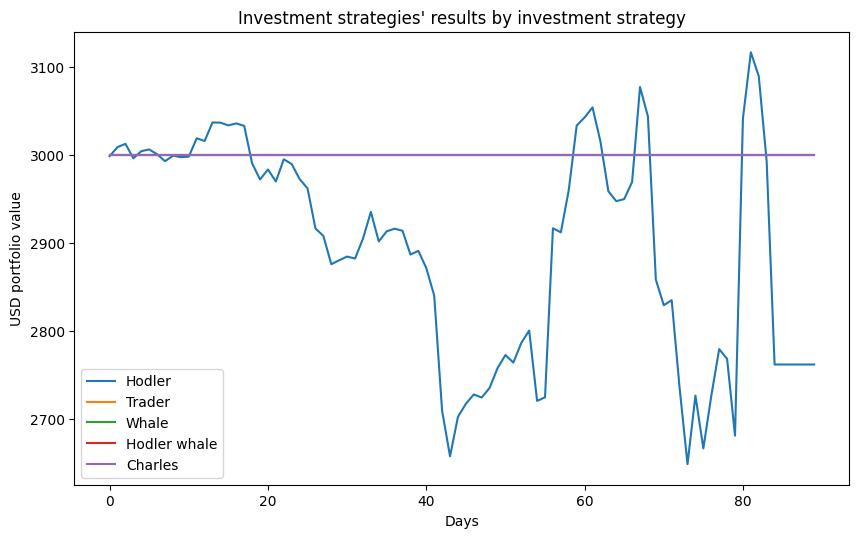

In [40]:
model = LinearRegressionBaselineModel()
df = ApiCall().read_local(data="all")

Y_true_past, Y_true, Y_test, Y_pred = cross_val_trade(model,df,cv=False,verbose=True)
positions = iterate_portfolio_positions(model, df = df, cv=False,verbose=True)
plot_portolio_positions()

(1408, 32)


/Users/alexandrelaizet/.pyenv/versions/3.8.12/envs/bitcoin/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.908e+00, tolerance: 1.509e-03
  model = cd_fast.enet_coordinate_descent(


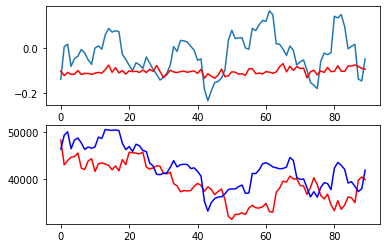

In [24]:
model = LinearRegressionBaselineModel()
df = ApiCall().read_local(data="all")
Y_true_past, Y_true, Y_test, Y_pred = cross_val_trade(model,df,cv=False,verbose=True)
fig,axs = plt.subplots(2,1)
axs[0].plot(Y_test)

axs[0].plot(Y_pred, c= "r")
plt.show
#axs[1].plot(Y_true)
axs[1].plot(Y_true_past + Y_true_past* Y_pred, c= "r")
axs[1].plot(Y_true_past + Y_true_past* Y_test, c= "b")


In [16]:
np.max(Y_pred)

-0.06770293911664738

In [27]:
index = 89
print(Y_true_past[index],Y_pred[index],Y_true_past[index] + Y_true_past[index]* Y_pred[index])

43936.409710091975 -0.09294297210022895 39852.82920822267
